Always perform TSA with ARIMA model first
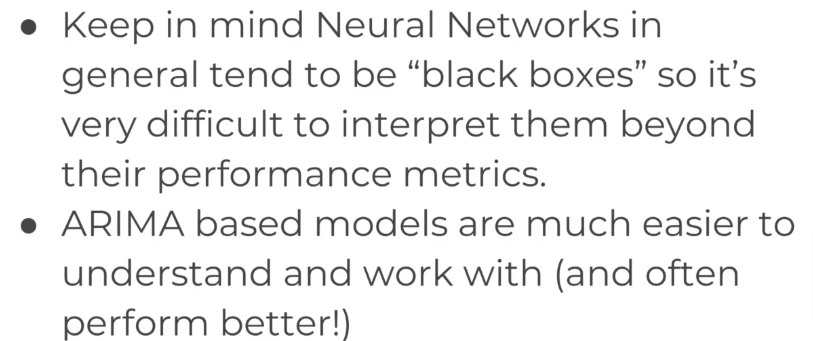

We want to have some variation to reflect the changes of input
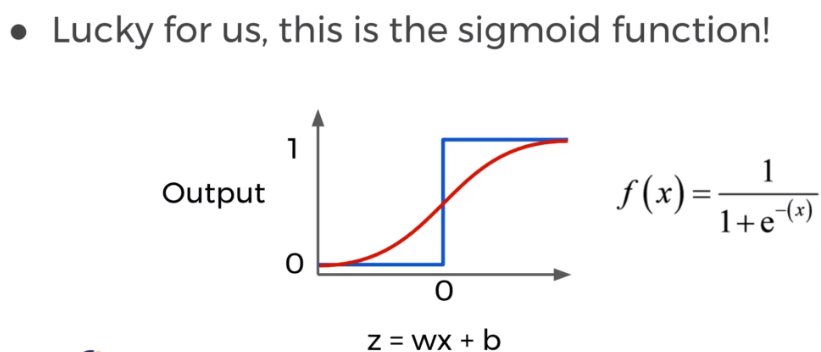
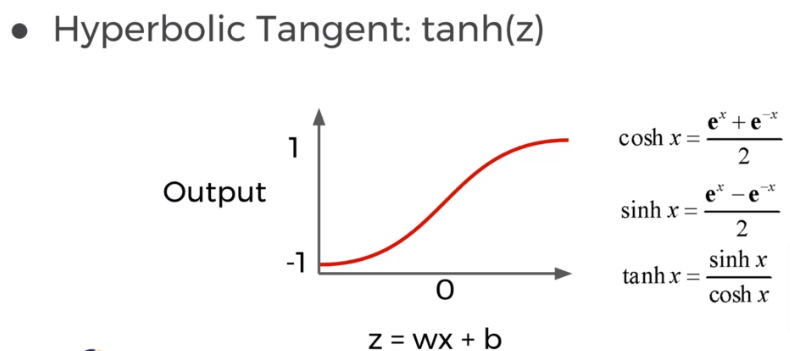
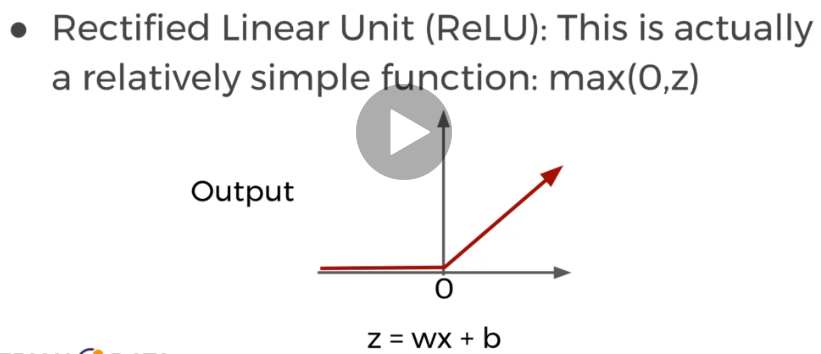
- ReLu tends to have best performance in many situations

# Keras Basic

In [1]:
#Use the tensorflow env for it
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [4]:
y = 2*x + b + noise

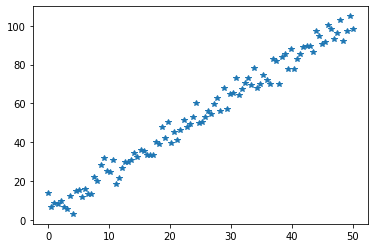

In [5]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [6]:
#pip install keras

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [10]:
model.fit(x, y, epochs=500, verbose=1)

Epoch 1/500
4/4 [==============================] - 0s 987us/step - loss: 4758.9548
Epoch 2/500
4/4 [==============================] - 0s 997us/step - loss: 4930.7401
Epoch 3/500
4/4 [==============================] - 0s 664us/step - loss: 5037.4841
Epoch 4/500
4/4 [==============================] - 0s 665us/step - loss: 4781.1607
Epoch 5/500
4/4 [==============================] - 0s 665us/step - loss: 4872.1085
Epoch 6/500
4/4 [==============================] - 0s 665us/step - loss: 4725.1677
Epoch 7/500
4/4 [==============================] - 0s 997us/step - loss: 4656.1822
Epoch 8/500
4/4 [==============================] - 0s 987us/step - loss: 4867.4985
Epoch 9/500
4/4 [==============================] - 0s 664us/step - loss: 4725.0444
Epoch 10/500
4/4 [==============================] - 0s 665us/step - loss: 4741.0462
Epoch 11/500
4/4 [==============================] - 0s 997us/step - loss: 4826.4319
Epoch 12/500
4/4 [==============================] - 0s 997us/step - loss: 4694.6523
E

4/4 [==============================] - 0s 665us/step - loss: 17.5530
Epoch 197/500
4/4 [==============================] - 0s 665us/step - loss: 17.9328
Epoch 198/500
4/4 [==============================] - 0s 665us/step - loss: 18.6648
Epoch 199/500
4/4 [==============================] - 0s 664us/step - loss: 17.0755
Epoch 200/500
4/4 [==============================] - 0s 997us/step - loss: 17.0772
Epoch 201/500
4/4 [==============================] - 0s 666us/step - loss: 16.6678
Epoch 202/500
4/4 [==============================] - 0s 665us/step - loss: 18.7646
Epoch 203/500
4/4 [==============================] - 0s 665us/step - loss: 17.0972
Epoch 204/500
4/4 [==============================] - 0s 997us/step - loss: 16.7875
Epoch 205/500
4/4 [==============================] - 0s 665us/step - loss: 17.9925
Epoch 206/500
4/4 [==============================] - 0s 665us/step - loss: 18.1811
Epoch 207/500
4/4 [==============================] - 0s 665us/step - loss: 18.4135
Epoch 208/500
4/4 

4/4 [==============================] - 0s 665us/step - loss: 18.5494
Epoch 393/500
4/4 [==============================] - 0s 665us/step - loss: 15.6871
Epoch 394/500
4/4 [==============================] - 0s 665us/step - loss: 16.5165
Epoch 395/500
4/4 [==============================] - 0s 665us/step - loss: 17.8595
Epoch 396/500
4/4 [==============================] - 0s 665us/step - loss: 15.9875
Epoch 397/500
4/4 [==============================] - 0s 665us/step - loss: 17.8357
Epoch 398/500
4/4 [==============================] - 0s 665us/step - loss: 17.0970
Epoch 399/500
4/4 [==============================] - 0s 665us/step - loss: 15.6633
Epoch 400/500
4/4 [==============================] - 0s 665us/step - loss: 16.4126
Epoch 401/500
4/4 [==============================] - 0s 665us/step - loss: 17.4343
Epoch 402/500
4/4 [==============================] - 0s 665us/step - loss: 16.9538
Epoch 403/500
4/4 [==============================] - 0s 665us/step - loss: 17.7464
Epoch 404/500
4/4 

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [11]:
x_for_predictions = np.linspace(0,50,1000)

In [12]:
y_predicted = model.predict(x_for_predictions)

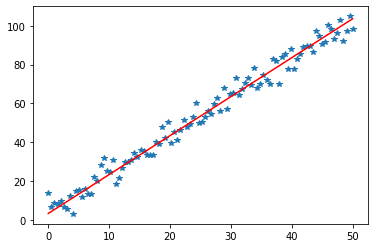

In [13]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [14]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [16]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [17]:
sklearn.metrics.mean_squared_error(y,prediction_for_true_y)

17.285500256953565

In [18]:
mean_absolute_error(y,prediction_for_true_y)

3.3646593826892617

## Recurrent NN
- Pass historical info in new neuron
- Has memory
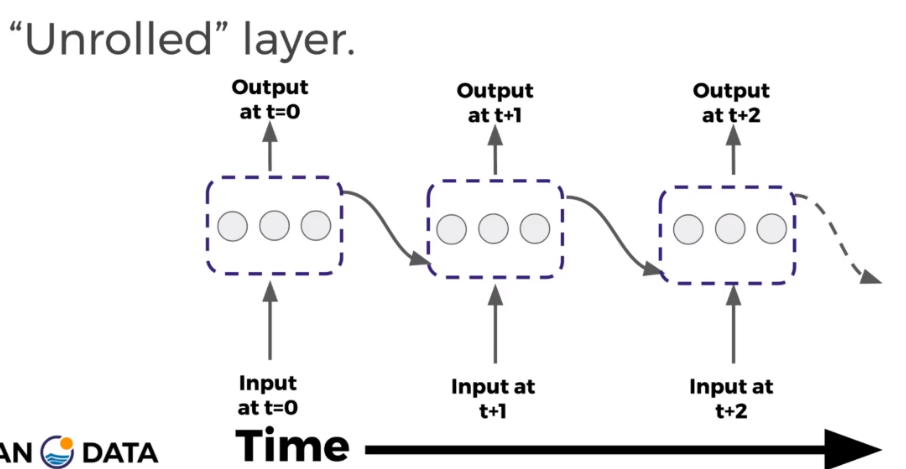

## LSTM & GRU

- RNN will forget the first inputs and the info is lost at each step going through RNN
- We need some "Long-term" memory for the NN
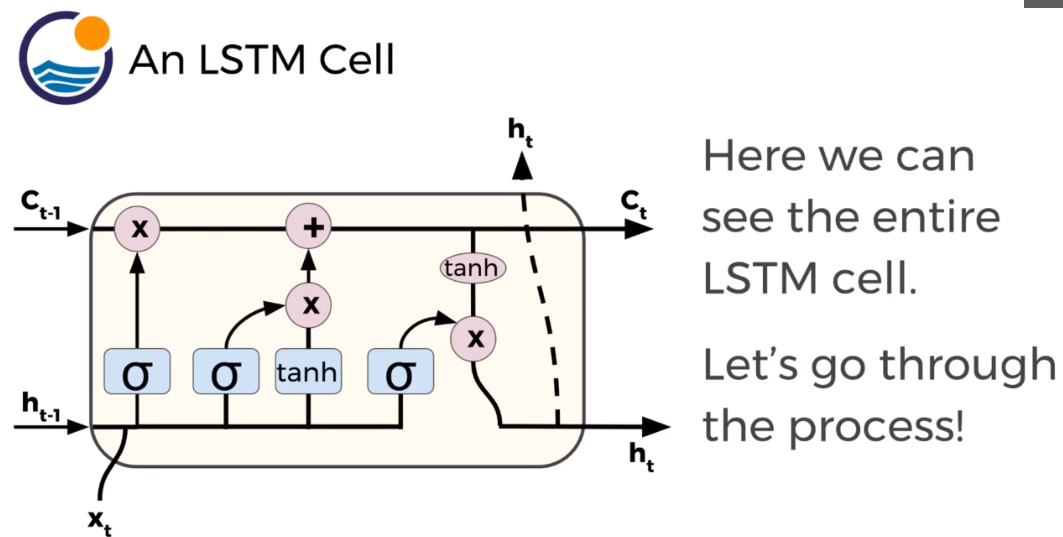

## Keras and RNN Project

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../Data/Alcohol_Sales.csv',index_col = 'DATE',parse_dates = True)

In [3]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [4]:
df.columns = ['Sales']

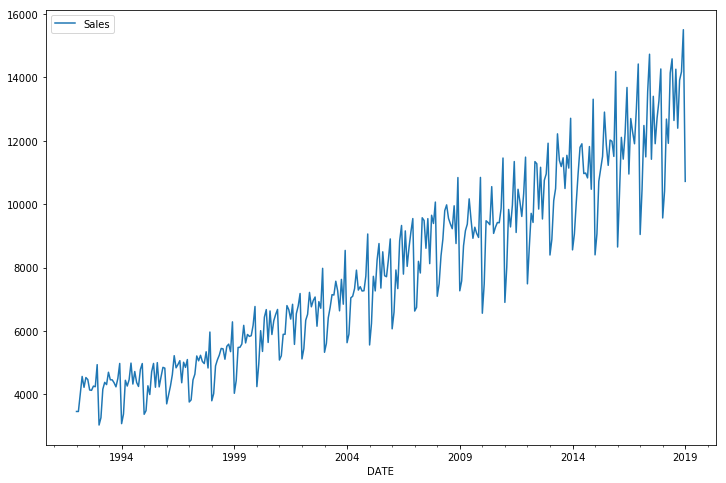

In [5]:
df.plot(figsize = (12,8))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
results = seasonal_decompose(df['Sales'])

In [8]:
#results.plot()

In [9]:
train = df.iloc[:313]
test = df.iloc[313:]

In [10]:
len(test)

12

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train) #finds the max value

C:\Users\penpe\anaconda3\envs\tsa_course\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [16]:
scaled_test 
#Scaled test can be slightly > 1 because scaler is trained on training data

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [22]:
#!pip install keras --upgrade

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

ImportError: SystemError: <built-in method __contains__ of dict object at 0x000002212F696318> returned a result with an error set

In [23]:
n_input = 2
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input,batch_size=1)
#Both coming from the same time series
#Use first two to predict the third

NameError: name 'TimeseriesGenerator' is not defined

In [22]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])